<big>**Практикум 2.7. Дифференцирование функций многих переменных. Формула Тейлора**</big>

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

**Упражнение 1.**

**a) Вычислите частные производные первого и второго порядка функции <big>$z(x,y)=cos(3x+y^2)$</big>.**

In [5]:
x, y = sp.symbols("x y")
f = sp.cos(3 * x + y**2)

print("Частные производные первого порядка:")
print("dz/dx:", sp.diff(f, x))
print("dz/dy:", sp.diff(f, y))

print("\nЧастные производные второго порядка:")
print("d2z/dx2:", sp.diff(f, x, 2))
print("d2z/dxdy:", sp.diff(sp.diff(f, x), y))
print("d2z/dy2:", sp.diff(f, y, 2))

Частные производные первого порядка:
dz/dx: -3*sin(3*x + y**2)
dz/dy: -2*y*sin(3*x + y**2)

Частные производные второго порядка:
d2z/dx2: -9*cos(3*x + y**2)
d2z/dxdy: -6*y*cos(3*x + y**2)
d2z/dy2: -2*(2*y**2*cos(3*x + y**2) + sin(3*x + y**2))


**б) Найдите градиент функции <big>$f(x,y,z)=2x^3y+x-z$</big> в точке <big>$M_0(1,2,-3)$</big>.**

<big>$\nabla f(M_0) =\bigg(\frac{\partial }{\partial x}\bigg|_{M_0} ; \frac{\partial }{\partial y}\bigg|_{M_0} ; \frac{\partial }{\partial k}\bigg|_{M_0}\bigg)$</big>

In [6]:
def funcInPoint3(f, point):
    return f.subs(x, point[0]).subs(y, point[1]).subs(z, point[2])

x, y, z = sp.symbols("x y z")
f = 2 * x**3 * y + x - z
point = [1, 2, -3]

print("Частные производные первого порядка:")
print("dz/dx:", sp.diff(f, x))
print("dz/dy:", sp.diff(f, y))
print("dz/dy:", sp.diff(f, z))

print("\nГрадиент функции в точке ", point, ": (", funcInPoint3(sp.diff(f, x), point), ", ", funcInPoint3(sp.diff(f, y), point), ", ", funcInPoint3(sp.diff(f, z), point), ")", sep="",)

Частные производные первого порядка:
dz/dx: 6*x**2*y + 1
dz/dy: 2*x**3
dz/dy: -1

Градиент функции в точке [1, 2, -3]: (13, 2, -1)


**Упражнение 2. Вычислите якобиан перехода от декартовой системы координат к цилиндрической (переход осуществляется по формулам <big>$x=rcosφ$</big>, <big>$y=rsinφ$</big>, <big>$z=z$</big>).**

In [7]:
r, phi, z = sp.symbols("r φ z")

# формулы перехода от декартовой системы координат к цилиндрической
x = r * sp.cos(phi)
y = r * sp.sin(phi)
z = z

# вектор функций перехода для составления матрицы
A = sp.Matrix([[x, y, z]])

# матрица производных (транспонирована для более удобного составления)
B = sp.Matrix([[sp.diff(A, r)], [sp.diff(A, phi)], [sp.diff(A, z)]])
print("Матрица производных:\n")
sp.pprint(B.T)

# вычисление якобиана
print("\nЯкобиан:", sp.simplify(B.det()))

Матрица производных:

⎡cos(φ)  -r⋅sin(φ)  0⎤
⎢                    ⎥
⎢sin(φ)  r⋅cos(φ)   0⎥
⎢                    ⎥
⎣  0         0      1⎦

Якобиан: r


**Упражнение 3.**

**a) Создайте функцию, вычисляющую первый дифференциал функции <big>$f(x,y)$</big> в точке <big>$(x_0,y_0)$</big> при приращениях <big>$Δx$</big>, <big>$Δy$</big>.**

In [8]:
def getDiff(f, dx, dy):
    return sp.diff(f, x) * dx + sp.diff(f, y) * dy

def funcInPoint2(f, point):
    return f.subs(x, point[0]).subs(y, point[1])

**б) Найдите первый дифференциал <big>$dz$</big> функции <big>$z=xy^2+2y-x^2$</big> в точке <big>$(2,-1)$</big>, если <big>$Δx=0.1$</big>, <big>$Δy=-0.2$</big>.**

In [9]:
x, y = sp.symbols("x y")
f = x * y**2 + 2 * y - x**2
point = [2, -1]
delta_x = 0.1
delta_y = -0.2

print(funcInPoint2(getDiff(f, delta_x, delta_y), point))

0.100000000000000


**Упражнение 4.**

**a) Создайте функцию, вычисляющую второй дифференциал функции <big>$f(x,y)$</big> в точке <big>$(x_0,y_0)$</big> при приращениях <big>$Δx$</big>, <big>$Δy$</big>.**

In [10]:
def getSecondDiff(f, dx, dy):
    return (sp.diff(f, x, 2) * dx**2 + 2 * sp.diff(sp.diff(f, x), y) * dx * dy + sp.diff(f, y, 2) * dy**2)

def funcInPoint2(f, point):
    return f.subs(x, point[0]).subs(y, point[1])

**б) Найдите второй дифференциал <big>$d^2z$</big> функции <big>$z=xy^2+2y-x^2$</big> в точке <big>$(2,-1)$</big>, если <big>$Δx=0.1$</big>, <big>$Δy=-0.2$</big>.**

In [11]:
x, y = sp.symbols("x y")
f = x * y**2 + 2 * y - x**2
point = [2, -1]
delta_x = 0.1
delta_y = -0.2

print(funcInPoint2(getSecondDiff(f, delta_x, delta_y), point))

0.220000000000000


**Упражнение 5.**

**а) Создайте функцию, раскладывающую функцию <big>$f(x,y)$</big> в точке <big>$(x_0,y_0)$</big> в ряд Тейлора до членов 1-го порядка включительно.**

In [24]:
def funcInPoint2(f, point):
    return f.subs(x, point[0]).subs(y, point[1])

def getDiff(f, dx, dy):
    return sp.diff(f, x) * dx + sp.diff(f, y) * dy

def getFirstTaylor(f, point, dx, dy):
    fTaylor = f + getDiff(f, dx, dy)
    return funcInPoint2(fTaylor, point)

**б) Используйте функцию из а) для вычисления приближенного значения функции <big>$z=f(x,y)$</big> в точке <big>$(x_0,y_0)$</big>. Сравните полученный результат с точным значением этой функции в указанной точке.**

**<big>$f(x,y) = (2x^4+y^4)^2$</big>,  <big>$M_o = (0.8; 2.2)$</big> <big>$\Rightarrow x_0 = 1$</big>, <big>$y_o = 2$</big>, <big>$Δx=-0.2$</big>, <big>$Δy=0.2$</big>**

In [25]:
x, y = sp.symbols("x y")
f = (2 * x**4 + y**4) ** 2
point = [1, 2]
delta_x = -0.2
delta_y = 0.2

print("Выражение для приближённого значения функции первого порядка:", sp.simplify(f + getDiff(f, delta_x, delta_y)))
print("Приближенное значение функции:", float((getFirstTaylor(f, point, delta_x, delta_y))))
print("Точное значение функции:", f.subs(x, point[0] + delta_x).subs(y, point[1] + delta_y))

Выражение для приближённого значения функции первого порядка: -x**3*(6.4*x**4 + 3.2*y**4) + y**3*(3.2*x**4 + 1.6*y**4) + (2*x**4 + y**4)**2
Приближенное значение функции: 496.80000000000007
Точное значение функции: 587.810327040000


**в) Постройте в одной системе координат в области <big>$x\in[a;b]$</big>, <big>$y\in[c;d]$</big> поверхности <big>$z=f(x,y)$</big> и <big>$z=p_1(x,y)$</big>**

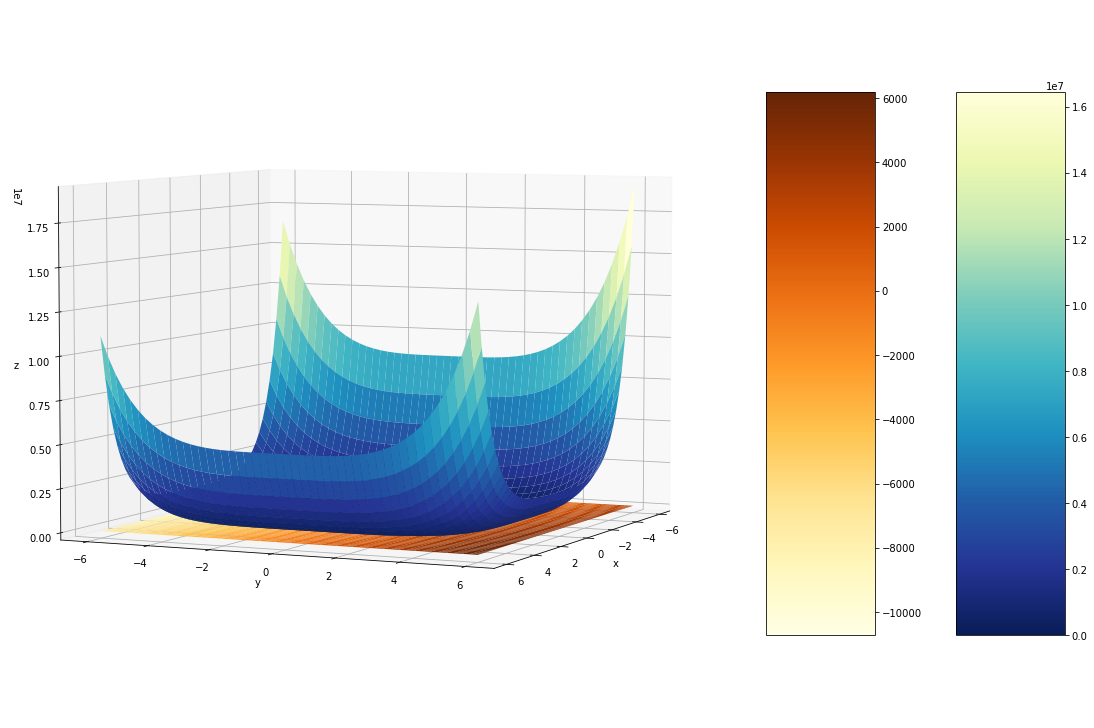

In [14]:
a = c = -6
b = d = 6

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection="3d")

xs = np.linspace(a, b, 50)
ys = np.linspace(a, b, 50)
X, Y = np.meshgrid(xs, ys)
# выражение для приближённого значения функции первого порядка:
Z = (-(X**3) * (6.4 * X**4 + 3.2 * Y**4) + Y**3 * (3.2 * X**4 + 1.6 * Y**4) + (2 * X**4 + Y**4) ** 2)
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)

xs = np.linspace(a, b, 50)
ys = np.linspace(a, b, 50)
X, Y = np.meshgrid(xs, ys)
Z = (f.subs(x, point[0]).subs(y, point[1]) + funcInPoint2(sp.diff(f, x), point) * (X - point[0]) + funcInPoint2(sp.diff(f, y), point) * (Y - point[1]))
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlOrBr, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

# параметры координатной плоскости
ax.elev = 5
ax.azim = 25
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()

plt.show()

**Упражнение 6.**

**а) Создайте функцию, раскладывающую функцию <big>$f(x,y)$</big> в точке <big>$(x_0,y_0)$</big> в ряд Тейлора до членов 2-го порядка включительно.**

In [15]:
def funcInPoint2(f, point):
    return f.subs(x, point[0]).subs(y, point[1])

def getDiff(f, dx, dy):
    return sp.diff(f, x) * dx + sp.diff(f, y) * dy

def getSecondDiff(f, dx, dy):
    return (sp.diff(f, x, 2) * dx**2 + 2 * sp.diff(sp.diff(f, x), y) * dx * dy + sp.diff(f, y, 2) * dy**2)

def getSecondTaylor(f, point, dx, dy):
    fTaylor = f + getDiff(f, dx, dy) + 0.5 * getSecondDiff(f, dx, dy)
    return funcInPoint2(fTaylor, point)

**б) Используйте функцию из а) для вычисления приближенного значения функции <big>$z=f(x,y)$</big> в точке <big>$(x_0,y_0)$</big>. Сравните полученный результат с точным значением этой функции в указанной точке.**

**<big>$f(x,y) = (2x^4+y^4)^2$</big>,  <big>$M_o = (0.8; 2.2)$</big> <big>$\Rightarrow x_0 = 1$</big>, <big>$y_o = 2$</big>, <big>$Δx=-0.2$</big>, <big>$Δy=0.2$</big>**

In [16]:
x, y = sp.symbols("x y")
f = (2 * x**4 + y**4) ** 2
point = [1, 2]
delta_x = -0.2
delta_y = 0.2

print("Выражение для приближённого значения функции второго порядка:", sp.simplify(f + getDiff(f, delta_x, delta_y) + 0.5 * getSecondDiff(f, delta_x, delta_y)))
print("Приближенное значение функции:", float((getSecondTaylor(f, point, delta_x, delta_y))))
print("Точное значение функции:", f.subs(x, point[0] + delta_x).subs(y, point[1] + delta_y))

Выражение для приближённого значения функции второго порядка: -2.56*x**3*y**3 - x**3*(6.4*x**4 + 3.2*y**4) + x**2*(4.48*x**4 + 0.96*y**4) + y**3*(3.2*x**4 + 1.6*y**4) + y**2*(0.96*x**4 + 1.12*y**4) + (2*x**4 + y**4)**2
Приближенное значение функции: 571.68
Точное значение функции: 587.810327040000


**в) Постройте в одной системе координат в области <big>$x\in[a;b]$</big>, <big>$y\in[c;d]$</big> поверхности <big>$z=f(x,y)$</big>, <big>$z=p_1(x,y)$</big> и <big>$z=p_2(x,y)$</big>.**

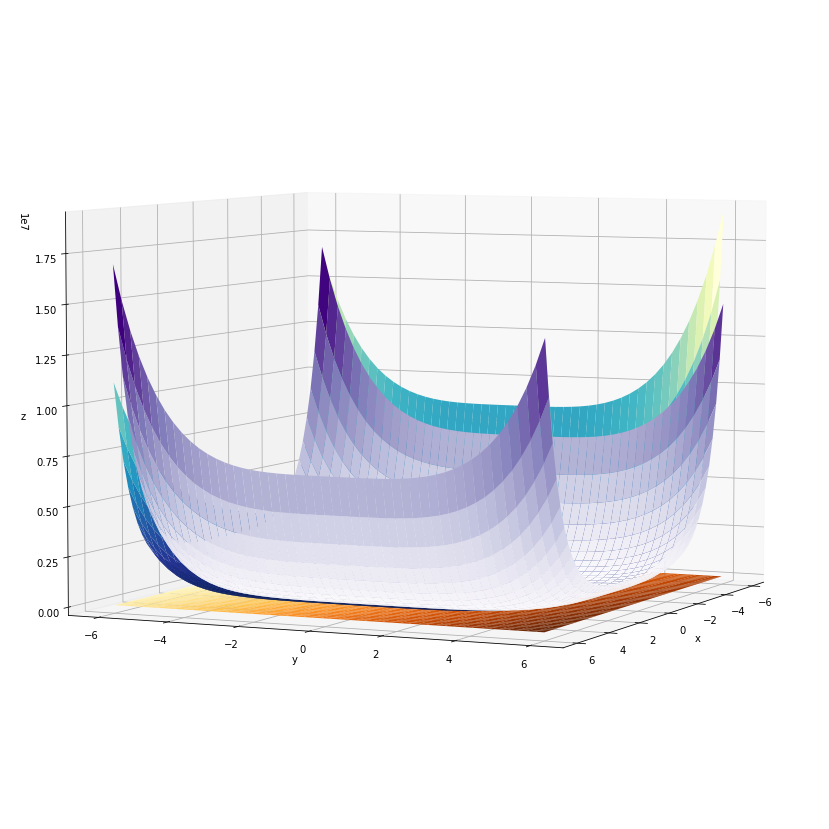

In [17]:
a = c = -6
b = d = 6

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")

xs = np.linspace(a, b, 50)
ys = np.linspace(a, b, 50)
X, Y = np.meshgrid(xs, ys)
# выражение для приближённого значения функции первого порядка:
Z = (-(X**3) * (6.4 * X**4 + 3.2 * Y**4) + Y**3 * (3.2 * X**4 + 1.6 * Y**4) + (2 * X**4 + Y**4) ** 2)
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, linewidth=0)

xs = np.linspace(a, b, 50)
ys = np.linspace(a, b, 50)
X, Y = np.meshgrid(xs, ys)
# выражение для приближённого значения функции второго порядка
Z = (-2.56 * X**3 * Y**3 - Y**3 * (6.4 * X**4 + 3.2 * Y**4) + X**2 * (4.48 * X**4 + 0.96 * Y**4) + Y**3 * (3.2 * X**4 + 1.6 * Y**4) + Y**2 * (0.96 * X**4 + 1.12 * Y**4) + (2 * X**4 + Y**4) ** 2)
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.Purples, linewidth=0)

xs = np.linspace(a, b, 50)
ys = np.linspace(a, b, 50)
X, Y = np.meshgrid(xs, ys)
Z = (f.subs(x, point[0]).subs(y, point[1]) + funcInPoint2(sp.diff(f, x), point) * (X - point[0]) + funcInPoint2(sp.diff(f, y), point) * (Y - point[1]))
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlOrBr, linewidth=0)

# параметры координатной плоскости
ax.elev = 5
ax.azim = 25
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()

plt.show()

**Упражнение 1C. Вычислите якобиан перехода от декартовой системы координат к сферической (переход осуществляется по формулам <big>$x=rsin(\theta)cos(\phi)$</big>, <big>$y=rsin(\theta)sin(\phi)$</big>, <big>$z=rcos(\theta)$</big>).**

In [18]:
r, phi, theta = sp.symbols("r φ θ")

# формулы перехода от декартовой системы координат к цилиндрической
x = r * sp.sin(theta) * sp.cos(phi) 
y = r * sp.sin(theta) * sp.sin(phi) 
z = r * sp.cos(theta)

# вектор функций перехода для составления матрицы
A = sp.Matrix([[x, y, z]])
sp.pprint(A)

# матрица производных (транспонирована для более удобного составления)
B = sp.Matrix([[sp.diff(A, r)], [sp.diff(A, theta)], [sp.diff(A, phi)]])
print("Матрица производных:\n")
sp.pprint(B.T)

# вычисление якобиана
print("\nЯкобиан:", sp.simplify(B.det()))

[r⋅sin(θ)⋅cos(φ)  r⋅sin(θ)⋅sin(φ)  r⋅cos(θ)]
Матрица производных:

⎡sin(θ)⋅cos(φ)  r⋅cos(θ)⋅cos(φ)  -r⋅sin(θ)⋅sin(φ)⎤
⎢                                                ⎥
⎢sin(θ)⋅sin(φ)  r⋅sin(φ)⋅cos(θ)  r⋅sin(θ)⋅cos(φ) ⎥
⎢                                                ⎥
⎣   cos(θ)         -r⋅sin(θ)            0        ⎦

Якобиан: r**2*sin(θ)


**Упражнение C2. Создайте функцию, раскладывающую функцию <big>$f(x_1, ..., x_n)$</big> в точке <big>$(x^`_1,..., x^`_n)$</big> в ряд Тейлора до членов 2-го порядка включительно.**

In [26]:
def funcInPointN(f, point, xs):
    for i in range(len(xs)):
        f = f.subs(xs[i], point[i])
    return f

def getDiff(f, xs, dxs):
    d = 0
    for i in range(len(xs)):
        d += sp.diff(f, xs[i]) * dxs[i]
    return d

def getSecondDiff(f, xs, dxs):
    d2 = 0
    for i in range(len(xs)):
        d2 += sp.diff(f, xs[i], 2) * dxs[i]**2
    for i in range(len(xs)):
        for j in range(i+1, len(xs)):
            d2+= 2 * sp.diff(sp.diff(f, xs[i]), xs[j]) * dxs[i] * dxs[j]
    return d2

def getSecondTaylor(f, point, xs, dxs):
    fTaylor = f + getDiff(f, xs, dxs) + 0.5 * getSecondDiff(f, xs, dxs)
    return funcInPointN(fTaylor, point, xs)

**Проверка:**

In [27]:
x, y = sp.symbols("x y")
f = (2 * x**4 + y**4) ** 2
point = [1, 2]
xs = [x, y]
dxs = [-0.2, 0.2]

print("Выражение для приближённого значения функции второго порядка:", sp.simplify(f + getDiff(f, xs, dxs) + 0.5 * getSecondDiff(f, xs, dxs)))
print("Приближенное значение функции:", (getSecondTaylor(f, point, xs, dxs)))
print("Точное значение функции:", (funcInPointN(f, [point[i]+dxs[i] for i in range(len(xs))], xs)))

Выражение для приближённого значения функции второго порядка: -2.56*x**3*y**3 - x**3*(6.4*x**4 + 3.2*y**4) + x**2*(4.48*x**4 + 0.96*y**4) + y**3*(3.2*x**4 + 1.6*y**4) + y**2*(0.96*x**4 + 1.12*y**4) + (2*x**4 + y**4)**2
Приближенное значение функции: 571.680000000000
Точное значение функции: 587.810327040000


In [28]:
x, y, z = sp.symbols("x y z")
f = (2 * x**4 + y**4 *z**2)
point = [1, 2, 3]
xs = [x, y, z]
dxs = [-0.2, 0.2, 0.1]

print("Выражение для приближённого значения функции второго порядка:", sp.simplify(f + getDiff(f, xs, dxs) + 0.5 * getSecondDiff(f, xs, dxs)))
print("Приближенное значение функции:", (getSecondTaylor(f, point, xs, dxs)))
print("Точное значение функции:", (funcInPointN(f, [point[i]+dxs[i] for i in range(len(xs))], xs)))

Выражение для приближённого значения функции второго порядка: 2*x**4 - 1.6*x**3 + 0.48*x**2 + y**4*z**2 + 0.2*y**4*z + 0.01*y**4 + 0.8*y**3*z**2 + 0.16*y**3*z + 0.24*y**2*z**2
Приближенное значение функции: 224.720000000000
Точное значение функции: 225.939216000000
